# Regresiones y Correlaciones múltiples

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

La potencia generada por un motor es una variable que depende de múltiples factores. Un grupo de ingenieros quiere establecer cuál es la combinación ideal de revoluciones por minuto (RPM), octanos de combustibles y rata de compresión que maximiza la potencia de un motor.
Para esto, los ingenieros prueban el motor a diferentes condiciones de operación y obtienen la siguiente información:

In [9]:
dataMotor = pd.read_csv('data.csv')
dataMotor.head()

,RPM,Octanos Combustible,Rata Compresion,Potencia
0,2000,92.66,100,227.66
1,1800,96.66,95,214.66
2,2400,90.66,110,231.66
3,1900,93.66,96,224.66
4,1600,88.66,100,221.66


¿Cuál es la tendencia que siguen los datos respecto a la potencia? Para esto construya la matriz de dispersión de los datos y concluya apropiadamente

Como se puede observar todos los datos en la última conlumna que es la relación de todos los datos con respecto a la potencia, la tendencia de los datos es directa con lo cual podemos afirmar que al aumentar el RPM, los octanos de combustible y la rata Compresión, los patencia también aumentará, aunque claramente hay valores que tienen más fuerza en la variable objetivo.

Correlación entre Potencia y RPM = 0.398281

Correlación entre Potencia y Octanos de combustible = 0.545856

Correlación entre Potencia y Rata de compresion = 0.605737

In [10]:
dataMotor.corr()

,RPM,Octanos Combustible,Rata Compresion,Potencia
RPM,1.000000,-0.083383,0.123374,0.398281
Octanos Combustible,-0.083383,1.000000,-0.011077,0.545856
Rata Compresion,0.123374,-0.011077,1.000000,0.605737
Potencia,0.398281,0.545856,0.605737,1.000000


Construya un modelo lineal que le permita predicir la potencia en función de las RPM, los octanos y la rata de comprensión ¿Este modelo es adecuado y cumple con los supuestos?, ¿Puede decirse que el modelo es verdaderamente predictivo?

**CONCLUSION DEL MODELO**

 Potencia = -269.0816853 + 0.01075434·RPM + 3.04419429·OctanosCombustible + 1.92855914·RataCompresion 
    
$ R^{2} = 0.81 $
    
Durbin-Watson: $ 1.304 > 0.05 $ Cumple con el primer supuesto

Puedo decir que el modelo es verdaderamente predictivo porque cumple con los supuestos, además hay un $ R^{2} $ muy alto que puede explicar el 81% de los datos.
    

In [11]:
# Use only one feature
dataMotor_X = dataMotor[["RPM", "Octanos Combustible", "Rata Compresion"]]
dataMotor_Y = dataMotor[["Potencia"]]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dataMotor_X, dataMotor_Y)

# Make predictions using the testing set
potencia_pred = regr.predict(dataMotor_X)

In [12]:
# The coefficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(dataMotor_Y, potencia_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(dataMotor_Y, potencia_pred ))

Intercept: 
 [-269.0816853]
Coefficients: 
 [[0.01075434 3.04419429 1.92855914]]
Mean squared error: 50.46
Variance score: 0.81


Utilice la ecuación de regresión obtenida para calcular la potencia teórica y grafique en una gráfica X y Y la potencia predicha vs la potencia experimental ¿Concluye usted que el modelo es adecuado basado en dicha Figura?

Como se puede observar en el gráfico el modelo es adecuado porque los datos siguen la linea recta con una pendiente de 1 que indica la conicidencia entre los datos predichos y los datos reales

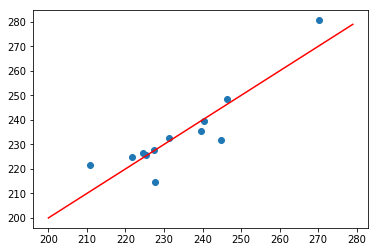

In [27]:
plt.scatter(potencia_pred, dataMotor_Y)
plt.plot(list(range(200,280)),list(range(200,280)), color = 'red')

¿Cuáles son las variables que mejor explican la potencia del motor?, apóyese en un particionamiento hierárquico y concluya apropiadamente

El orden de significancia con respecto a las variables que mejor explican la potencia del motor apoyado en la tabla ANOVA, es la siguiente:

1. Rata Compresion:  $ valor_P = 5.84742409e^{-18} $

2. Octanos Combustible: $ valor_P = 9.32817308e^{-19} $

3. RPM: $ valor_P = 1.63567881e^{-11} $

In [14]:
f_RPM, p_RPM = stats.f_oneway(dataMotor[["RPM"]].values, dataMotor[["Potencia"]].values)
f_RPM, p_RPM

(array([157.87153223]), array([1.63567881e-11]))

In [15]:
f_OctComb, p_OctComb = stats.f_oneway(dataMotor[["Octanos Combustible"]].values, dataMotor[["Potencia"]].values)
f_OctComb,p_OctComb

(array([793.91318714]), array([9.32817308e-19]))

In [16]:
f_ratCom, p_ratCom = stats.f_oneway(dataMotor[["Rata Compresion"]].values, dataMotor[["Potencia"]].values)
f_ratCom, p_ratCom

(array([668.66126294]), array([5.84742409e-18]))